Вы — аналитик данных, и сейчас идёте в стартап, который создает новый маркетплейс. Он недавно появился на рынке и занимается продажей новых товаров из Бразилии, которые только начинают поступать в продажу.

Продакт-менеджер Петя переживает за свой продукт, так как выручка маркетплейса стоит на месте уже несколько месяцев. Он предложил вам полную свободу действий. Главное — чтобы метрики росли, а мы не причиняли неудобства клиентам, ведь Петя заботится об их опыте.

Файлы:

     olist_customers_dataset.csv — таблица с уникальными идентификаторами пользователей

customer_id — позаказный идентификатор пользователя

customer_unique_id — уникальный идентификатор пользователя (аналог номера паспорта)

customer_zip_code_prefix — почтовый индекс пользователя

customer_city — город доставки пользователя

customer_state — штат доставки пользователя

    olist_orders_dataset.csv —  таблица заказов

order_id — уникальный идентификатор заказа (номер чека)

customer_id — позаказный идентификатор пользователя

order_status — статус заказа

order_purchase_timestamp — время создания заказа

order_approved_at — время подтверждения оплаты заказа

order_delivered_carrier_date — время передачи заказа в логистическую службу

order_delivered_customer_date — время доставки заказа

order_estimated_delivery_date — обещанная дата доставки

    olist_order_items_dataset.csv — товарные позиции, входящие в заказы

order_id — уникальный идентификатор заказа (номер чека)

order_item_id — идентификатор товара внутри одного заказа

product_id — ид товара (аналог штрихкода)

seller_id — ид производителя товара

shipping_limit_date — максимальная дата доставки продавцом для передачи заказа партнеру по логистике

price — цена за единицу товара

freight_value — вес товара

**Уникальные статусы заказов в таблице olist_orders_dataset:**

    created — создан;

    approved — подтверждён;

    invoiced — выставлен счёт;

    processing — в процессе сборки заказа;

    shipped — отгружён со склада;

    delivered — доставлен пользователю;

    unavailable — заказ отменён по причине недоступности товара;;

    canceled — отменён.


**Задачи:**


    Задача 1: Оценить месячный retention в оформление заказа с помощью когортного анализа.

    Задача 2: Определить, существует ли product/market fit у этого маркетплейса.

    Задача 3: Определить 5 основных метрик, на которых продакту можно сконцентрироваться, чтобы максимизировать прибыль компании.

    Задача 4: Выбрать одну из 3 основных гипотез с помощью фреймворка ICE.

    Задача 5: Сформулировать нужные метрики, на которые ваша гипотеза должна повлиять.

    Задача 6: Сформулировать выводы о проделанной работе.

In [6]:
import pandas as pd #импортируем библиотеки
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [7]:
orders = pd.read_csv('olist_orders_dataset.csv') #загрузим данные (загрузила файлы с данными так как не прогонялся ноутбук)
orders_items = pd.read_csv('olist_order_items_dataset.csv')
customers = pd.read_csv('olist_customers_dataset.csv')

Посмотрим на датасеты.

In [8]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
orders_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [10]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Выведем количество строк и столбцов в датасетах

In [11]:
orders.shape

(99441, 8)

In [12]:
orders_items.shape

(112650, 7)

In [13]:
customers.shape

(99441, 5)

Выведем количество пропусков в датасетах.

In [14]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [15]:
orders_items.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [16]:
customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [17]:
#доля пропусков по всем столбцам
missing_ratios = orders.isna().mean()
missing_ratios

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.001609
order_delivered_carrier_date     0.017930
order_delivered_customer_date    0.029817
order_estimated_delivery_date    0.000000
dtype: float64

In [18]:
orders.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,5bf8d66f260e15878a0e458ba4f33158,ead9596c98d884370562f862c8f9e349,delivered,2018-08-02 12:06:09,2018-02-27 04:31:10,2018-05-09 15:48:00,2017-12-02 00:26:45,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [19]:
orders_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [20]:
customers.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [21]:
orders = orders.dropna()

**Задача 1: Оценить месячный retention в оформление заказа с помощью когортного анализа.**

In [22]:
print(orders['order_status'].unique()) #выведем уникальные значения данных по статусу заказов

['delivered' 'canceled']


In [23]:
df = orders.merge(customers, on='customer_id', how='left') #объединим данные заказов и клиентов
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [24]:
orders_delivered = df[df['order_status'] == 'delivered'].copy() #фильтруем только доставленные заказы
orders_delivered

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
96456,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
96457,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
96458,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
96459,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [25]:
orders_delivered.dtypes #выведем типы данных столбцов датасета

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
customer_unique_id               object
customer_zip_code_prefix          int64
customer_city                    object
customer_state                   object
dtype: object

In [26]:
orders_delivered['order_date'] = pd.to_datetime(orders_delivered['order_purchase_timestamp']) #преобразуем тип данных столбца order_purchase_timestamp в datetime и запишем в столбец order_date

In [27]:
orders_delivered['first_order_date'] = orders_delivered.groupby('customer_unique_id')['order_date'].transform('min') #найдем дату первого заказа клиентов

In [28]:
orders_delivered['days_since_first_order'] = (orders_delivered['order_date'] - orders_delivered['first_order_date']).dt.days #найдем разницу в днях со дня первого заказа

In [29]:
orders_delivered['cohort_nmonth'] = (orders_delivered['days_since_first_order'] // 30).astype(int) #посчитаем количество месяцев с даты первого заказа

In [30]:
orders_delivered['cohort_month'] = orders_delivered['first_order_date'].dt.to_period('M') #выделим когорты по месяцу первого заказа
orders_delivered['cohort_month']

0        2017-09
1        2018-07
2        2018-08
3        2017-11
4        2018-02
          ...   
96456    2017-03
96457    2018-02
96458    2017-08
96459    2018-01
96460    2018-03
Name: cohort_month, Length: 96455, dtype: period[M]

In [31]:
cohort_quantity = orders_delivered.pivot_table(index='cohort_month', columns='cohort_nmonth', values='customer_unique_id', aggfunc='nunique') #построим таблицу с отображением количества вернувшихся клиентов в каждом месяце
cohort_quantity

cohort_nmonth,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,19,20,21
cohort_month,,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,262.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,...,1.0,NaN,1.0,NaN,1.0,NaN,1.0,2.0,1.0,1.0
2016-12,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,715.0,2.0,NaN,4.0,1.0,1.0,2.0,2.0,NaN,NaN,...,4.0,3.0,2.0,NaN,2.0,2.0,2.0,1.0,NaN,NaN
2017-02,1616.0,2.0,3.0,6.0,4.0,2.0,4.0,1.0,1.0,5.0,...,6.0,1.0,3.0,2.0,1.0,1.0,3.0,NaN,NaN,NaN
2017-03,2503.0,7.0,13.0,11.0,3.0,2.0,9.0,4.0,7.0,6.0,...,4.0,4.0,3.0,7.0,2.0,3.0,2.0,NaN,NaN,NaN
2017-04,2256.0,8.0,6.0,1.0,6.0,8.0,6.0,10.0,6.0,5.0,...,3.0,NaN,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN
2017-05,3450.0,15.0,13.0,8.0,13.0,11.0,11.0,4.0,10.0,9.0,...,11.0,6.0,3.0,7.0,4.0,NaN,NaN,NaN,NaN,NaN
2017-06,3037.0,13.0,16.0,10.0,6.0,15.0,9.0,6.0,4.0,10.0,...,8.0,3.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


Text(159.0, 0.5, 'Месяц первой покупки')

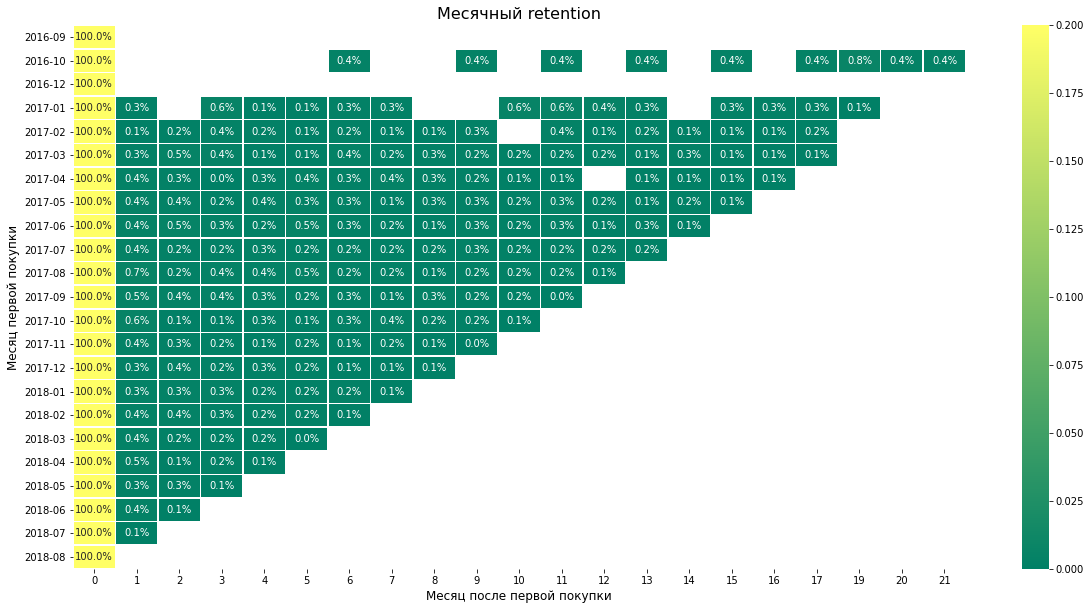

In [32]:
cohort_sizes = cohort_quantity.iloc[:, 0] #отметим размер когорт, число клиентов в n-ый месяц
retention = cohort_quantity.divide(cohort_sizes, axis=0).round(4) #построим ретеншн-матрицу
plt.figure(figsize=(20, 10)) #визуализация ретеншн-матрицы
sns.heatmap(retention, annot=True, fmt='.1%', cmap='summer', vmin=0, vmax=0.2, linewidths=0.5)#YlGnBu
plt.title('Месячный retention', fontsize=16)
plt.xlabel('Месяц после первой покупки', fontsize=12)
plt.ylabel('Месяц первой покупки', fontsize=12)

In [33]:
median_retention_month1 = retention[1].median() #посчитаем медианный retention 1-го месяца
print(f"Медианный ретеншн месяца 1: {median_retention_month1:.4f}")

Медианный ретеншн месяца 1: 0.0035


In [34]:
best_cohort = retention[3].idxmax().strftime('%Y-%m') #найдем лучшую когорту по 3-му месяцу
best_retention = retention[3].max()
print(f"Лучшая когорта: {best_cohort} с retention на 3-й месяц = {best_retention:.4f}")
print(f"Значение retention: {best_retention:.4f}")

Лучшая когорта: 2017-01 с retention на 3-й месяц = 0.0056
Значение retention: 0.0056


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

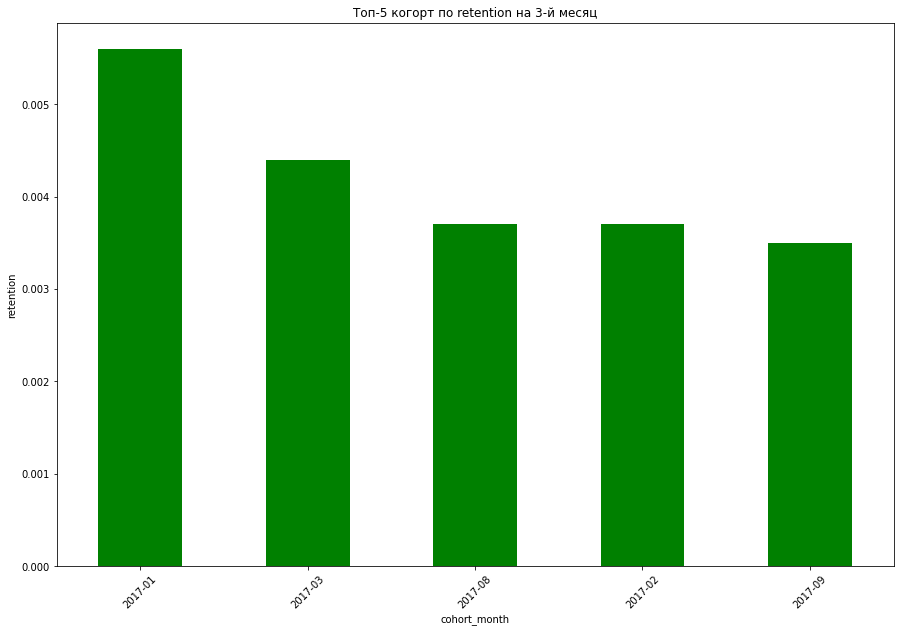

In [35]:
top_cohorts = retention[3].dropna().sort_values(ascending=False).head(5)#отобразим топ-когорты
plt.figure(figsize=(15, 10))
top_cohorts.plot(kind='bar', color='green')
plt.title('Топ-5 когорт по retention на 3-й месяц')
plt.ylabel('retention')
plt.xticks(rotation=45)

**Выводы:**

**Задача 2: Определить, существует ли product/market fit у этого маркетплейса.**

PMF (product/market fit) — это ситуация, когда продукт попадает точно в потребности рынка.

Исходя из результатов первой задачи видно, что retention на 1 и 3 месяцы очень низкий. В среднем менее 1% пользователей возвращаются спустя 1–3 месяца, что говорит о том, что большинство клиентов совершают только одну покупку, большинство клиентов не делают заказ повторно даже в первый месяц. Retention близок к нулю и быстро убывает, что сигнализирует об отсутствии product/market fit. Даже в «лучшей» когорте retention 3-го месяца более 99% пользователей не вернулись через 3 месяца, что говорит об отсутствии лояльности и привычки к маркетплейсу. На основании таких метрик product/market fit у маркетплейса отсутствует. Повторные покупки крайне редки, что говорит о низкой ценности продукта в глазах клиента. Однако, retention не уходит в 0 после первого месяца и видно стабильные значения удержания на 2–3 месяцах.

Для определения существования product/market fit у маркетплейса построим графики с отображением повторных заказов по дням  и неделям (проверим регулярность пользования продуктом).

In [36]:
orders_delivered['is_repeat'] = orders_delivered['order_date'] > orders_delivered['first_order_date'] #создадим столбец с отображением факта повторной покупки

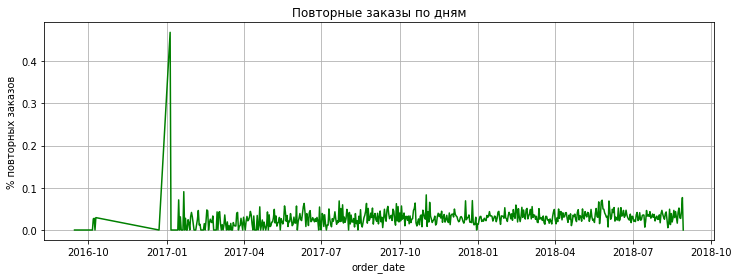

In [37]:
daily_repeats = orders_delivered.groupby(orders_delivered['order_date'].dt.date)['is_repeat'].mean() #визуализируем факт повторной покупки по дням
plt.figure(figsize=(12, 4))
daily_repeats.plot(color='green')
plt.title('Повторные заказы по дням')
plt.ylabel('% повторных заказов')
plt.grid()

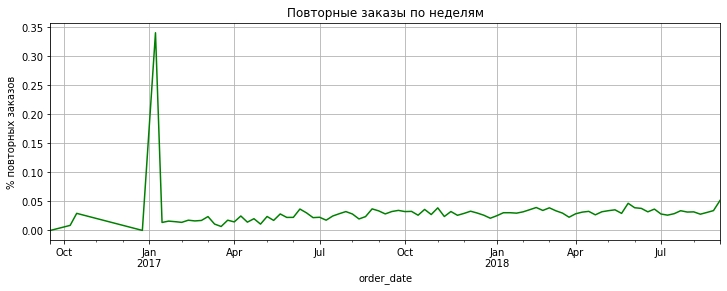

In [38]:
weekly_repeats = orders_delivered.groupby(orders_delivered['order_date'].dt.to_period('W'))['is_repeat'].mean() #визуализируем факт повторной покупки по неделям
plt.figure(figsize=(12, 4))
weekly_repeats.plot(color='green')
plt.title('Повторные заказы по неделям')
plt.ylabel('% повторных заказов')
plt.grid()

В среднем, повторные заказы составляют от 0% до 0.35% в неделю, это низкий уровень удержания. Всплеск в начале 2017 года: скорее всего, это ошибка в данных или же начало активности платформы или разовой маркетинговой акции.
После всплеска поведение выравнивается и остаётся на низком уровне. Повторные покупки почти не растут со временем, а значит, маркетплейс не совершенствует  удержание пользователей. Retention увеличивается, но очень мало и показатель все равно остается очень низким.

Сравним retention за 14 дней и 30 дней с момента первой покупки

In [39]:
rolling_14 = orders_delivered.groupby('customer_unique_id').agg({'days_since_first_order': 'max'}) #retention на 14 дней
rolling_retention_14 = (rolling_14['days_since_first_order'] >= 14).mean()
print(f"Rolling Retention 14 дней: {rolling_retention_14:.4%}")

Rolling Retention 14 дней: 1.8074%


In [40]:
rolling_30 = orders_delivered.groupby('customer_unique_id').agg({'days_since_first_order': 'max'}) #retention на 30 дней
rolling_retention_30 = (rolling_30['days_since_first_order'] >= 30).mean()
print(f"Rolling Retention 30 дней: {rolling_retention_30:.4%}")

Rolling Retention 30 дней: 1.5600%


Оба показателя очень низкие — меньше 2%, что говорит о слабом удержании клиентов. PMF — отсутствует, так как пользователи не возвращаются спустя 2–4 недели. Маркетплейс не удовлетворяет ключевую потребность клиента: в удобстве, ассортименте, сервисе или цене.

Вывод: Product/Market Fit отсутствует в связи с тем, что наблюдается очень низкий уровень повторных заказов, очень низкий retention, нет заметного увеличения retention, нет отдельных кагорт потребителей с устойчивой высокой лояльностью. Возможными причинами отсутствия PMF могут быть слабое ценностное предложение – маркетплейс не предлагает достаточной пользы для возврата клиента, проблемы с ассортиментом или ценами – возможно, товары недостаточно разнообразны или неконкурентны, плохой пользовательский опыт – неудобная доставка, интерфейс или проблемы с доверием, проблемы с самим маркетплейсом (сбои в работе платформы), ориентир потребителей только на разовые покупки.

Для приобретения Product/Market Fit необходимо выявить проблемы низкого уровня удержания клиентов. Возможно провести опросы и интервью клиентов. Возможно, стоит запустить акции, скидки или персональные предложения, создать прогрумму лояльности. Стоит провести исследование и понять какие типы товаров являются наиболее успешными и сделать на них акцент. Запустить A/B-тесты на отдельные сегменты: возможно, продукт работает только на конкретную аудиторию. Усовершенствовать доставку, систему подписок, уведомлений и напоминаний.

**Задача 3: Определить 5 основных метрик, на которых продакту можно сконцентрироваться, чтобы максимизировать прибыль компании.**

Определить 5 основных метрик, на которых продакт может сконцентрироваться, чтобы максимизировать прибыль компании.

    Первая метрика должна отражать рост объёма продаж маркетплейса.

    Вторая — показывать объем аудитории, которой продукт доставляет ценность.

    Третья — отражать заинтересованность новых клиентов в продукте.

    Четвёртая — отражать вовлеченность клиента в продолжение использования продукта.

    Пятая — отражать денежное выражение вовлеченности клиента.

In [41]:
df_metrics = orders_items.merge(orders_delivered, on='order_id', how='inner') #объединим данные с третьим датасетом orders_items с информацией о товарах
display(df_metrics)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_date,first_order_date,days_since_first_order,cohort_nmonth,cohort_month,is_repeat
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,2017-09-13 08:59:02,2017-09-13 08:59:02,0,0,2017-09,False
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,2017-04-26 10:53:06,2017-04-26 10:53:06,0,0,2017-04,False
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,2018-01-14 14:33:31,2018-01-14 14:33:31,0,0,2018-01,False
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,2018-08-08 10:00:35,2018-08-08 10:00:35,0,0,2018-08,False
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,2017-02-04 13:57:51,2017-02-04 13:57:51,0,0,2017-02,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110168,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,...,0c9aeda10a71f369396d0c04dce13a64,65077,sao luis,MA,2018-04-23 13:57:06,2018-04-23 13:57:06,0,0,2018-04,False
110169,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,...,0da9fe112eae0c74d3ba1fe16de0988b,81690,curitiba,PR,2018-07-14 10:26:46,2018-07-14 10:26:46,0,0,2018-07,False
110170,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,...,cd79b407828f02fdbba457111c38e4c4,4039,sao paulo,SP,2017-10-23 17:07:56,2017-10-23 17:07:56,0,0,2017-10,False
110171,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,...,eb803377c9315b564bdedad672039306,13289,vinhedo,SP,2017-08-14 23:02:59,2017-08-14 23:02:59,0,0,2017-08,False


In [42]:
df_metrics['order_month'] = df_metrics['order_date'].dt.to_period('M')

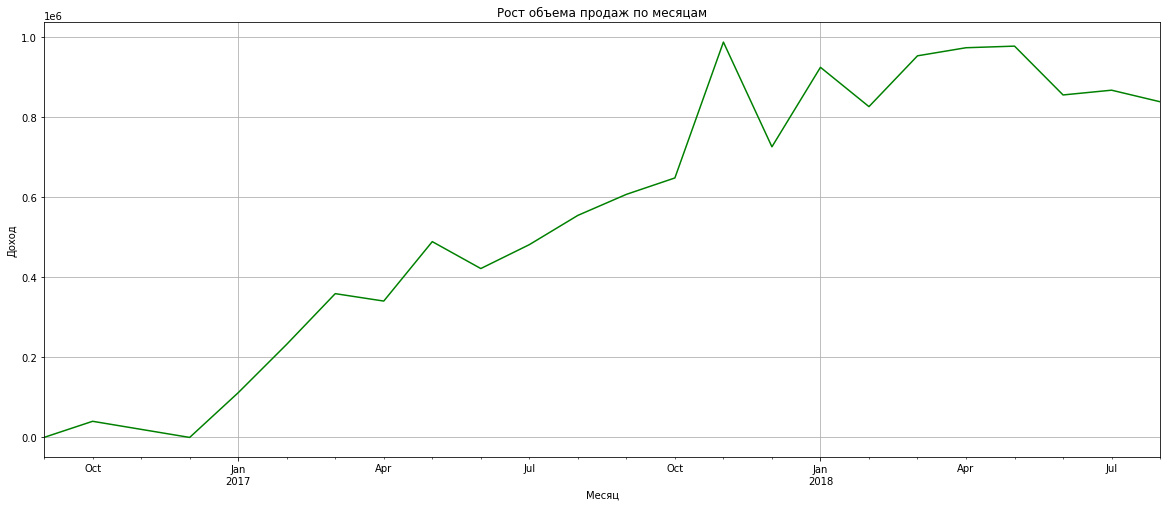

In [43]:
#Первая метрика должна отражать рост объёма продаж маркетплейса
monthly_sales = df_metrics.groupby('order_month')['price'].sum() #отражает суммарную выручку маркетплейса

plt.figure(figsize=(20, 8))
monthly_sales.plot(color='green')
plt.title('Рост объема продаж по месяцам')
plt.ylabel('Доход')
plt.xlabel('Месяц')
plt.grid()
plt.show()


С начала 2017 года наблюдается уверенный и быстрый рост объёма продаж. Пик достигнут к ноябрю 2017 года, после чего доход стабильно на высоком уровне.Заметны спады в декабре, июне что может быть связано с сезонными факторами (например, праздники, отпускной сезон и т.п.).Продажи стабильно растут, несмотря на незначительные колебания — это сигнал, что продукт востребован.После достижения пика в конце 2017 года, в 2018 году спрос удерживается на высоком уровне, что говорит о возросшем устойчивом интересе аудитории.

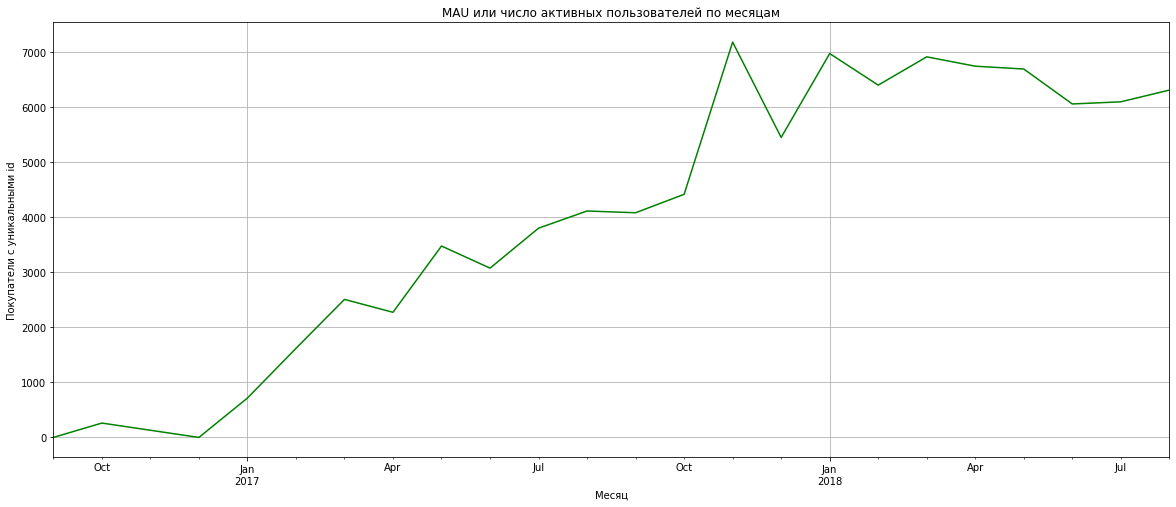

In [44]:
#Вторая — показывать объем аудитории, которой продукт доставляет ценность.
monthly_users = df_metrics.groupby('order_month')['customer_unique_id'].nunique() #показывает число уникальных покупателей в месяц

plt.figure(figsize=(20, 8))
monthly_users.plot(color='green')
plt.title('MAU или число активных пользователей по месяцам')
plt.ylabel('Покупатели с уникальными id')
plt.xlabel('Месяц')
plt.grid()

График показывает значительные колебания числа уникальных покупателей (MAU) в период с октября 2017 по июль 2018 года. Максимальная активность (6000-7000 пользователей) наблюдалась в ноябре 2017 и январе 2018. Минимальные значения (1000-2000 пользователей) зафиксированы в декабре 2016. Начиная с января 2017 года наблюдается стремительный рост числа активных пользователей. Особенно сильный прирост заметен с апреля по ноябрь 2017. Это может говорить о хорошем маркетинге, запуске новых фич, расширении ассортимента или сезонности. MAU достигает максимума в декабре 2017 (более 7000 активных пользователей). Вероятно, это связано с праздничным сезоном (рождественские и новогодние покупки).В январе 2018 — резкий спад, возможно, из-за окончания праздничного спроса. Пик активности виден в марте, мае, январе, октябре-ноябре. Это может быть связано с праздниками и праздничными скидками.

In [45]:
#Третья — отражать заинтересованность новых клиентов в продукте.
cohort_data = df_metrics.groupby('cohort_month').agg(new_users=('customer_unique_id', 'nunique'), repeaters=('is_repeat', 'sum')).reset_index()
cohort_data['repeat_rate'] = cohort_data['repeaters'] / cohort_data['new_users']
cohort_data['repeat_rate'] #выведем долю ноых клиентов с повторными заказами

0     0.000000
1     0.057252
2     1.000000
3     0.103497
4     0.050124
5     0.060727
6     0.055851
7     0.073623
8     0.072111
9     0.057836
10    0.062854
11    0.058456
12    0.048972
13    0.038674
14    0.028662
15    0.036247
16    0.046120
17    0.027901
18    0.023701
19    0.022595
20    0.012596
21    0.012277
22    0.008789
Name: repeat_rate, dtype: float64

Метрика repeat_rate показывает устойчиво низкие значения почти во всех когортных месяцах, за исключением одного аномального выброса (значение 1.0 на втором месяце). Большинство значений от 2 до 6,5%, это указывает на слабую вовлеченность новых пользователей после первой покупки. Постепенное снижение показателя с течением времени, начиная примерно с когорты 11 (месяц), значения идут вниз и достигают <1% в последних месяцах. Это может говорить о снижении эффективности онбординга, качества продукта или маркетинга, особенно в привлечении релевантной аудитории.

In [46]:
df_metrics['order_date'] = pd.to_datetime(df_metrics['order_purchase_timestamp'])
orders_metric = df_metrics.sort_values(by=['customer_id', 'order_date'])#отсортируем по дате

orders_metric['order_rank'] = orders_metric.groupby('customer_id')['order_date'].rank(method='first')#найдем первую и вторую покупки клиентов
first_orders = orders_metric[orders_metric['order_rank'] == 1]#разделим на первые и повторные заказы
next_orders = orders_metric[orders_metric['order_rank'] > 1]

merged = pd.merge(first_orders[['customer_id', 'order_date']], next_orders[['customer_id', 'order_date']], on='customer_id', suffixes=('_first', '_next'))#находим повторный заказ в течение 30 дней после первого
merged['days_diff'] = (merged['order_date_next'] - merged['order_date_first']).dt.days #фильтруем только те случаи, где заказ был в течение 30 дней

interested_clients = merged[merged['days_diff'] <= 30]['customer_id'].nunique()
total_new_clients = first_orders['customer_id'].nunique() #общее количество новых клиентов
interest_rate = interested_clients / total_new_clients #конверсия новых клиентов в повторный заказ в течение 30 дней

print(f"Заинтересованность новых клиентов (повторный заказ в 30 дней): {interest_rate:.4%}")

Заинтересованность новых клиентов (повторный заказ в 30 дней): 9.9881%


Продукт слабо удерживает новых клиентов. Возможные причины: нет явной потребности делать повторные заказы, высокая стоимость/доставка, ограниченное разнообразие или некачественный ассортимент, плохой опыт первой покупки.

In [47]:
#Четвёртая — отражать вовлеченность клиента в продолжение использования продукта.
customer_orders = df_metrics.groupby('customer_unique_id')['order_id'].nunique()#возьмем уникальные клиенты и их количество заказов
repeat_buyers = (customer_orders > 1).sum()  #повторные покупатели
total_customers = customer_orders.count()
repeat_ratio = repeat_buyers / total_customers
print(f"Повторные покупки: {repeat_ratio:.4%}")

Повторные покупки: 2.9999%


In [48]:
orders_per_customer = df_metrics.groupby('customer_unique_id')['order_id'].nunique().reset_index() #найдем количество заказов по каждому клиенту
orders_per_customer.columns = ['customer_unique_id', 'orders_count']
repeat_customers = orders_per_customer[orders_per_customer['orders_count'] > 1] #фильтруем только повторяющих клиентов
avg_orders_repeaters = repeat_customers['orders_count'].mean() #найдем среднее количество заказов на каждого вовлеченного клиента
print(f"Среднее количество заказов на вовлечённого клиента: {avg_orders_repeaters:.4f}")

Среднее количество заказов на вовлечённого клиента: 2.1139


Всего 2.9999% клиентов совершили более одного заказа.Это довольно низкий показатель, что говорит о слабом удержании и вовлечении. Среднее число заказов на одного вовлечённого клиента 2.1139 — если пользователь совершает повторную покупку, он чаще всего делает только один повтор. Это говорит о том, что продукт недостаточно мотивирует к возврату.

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


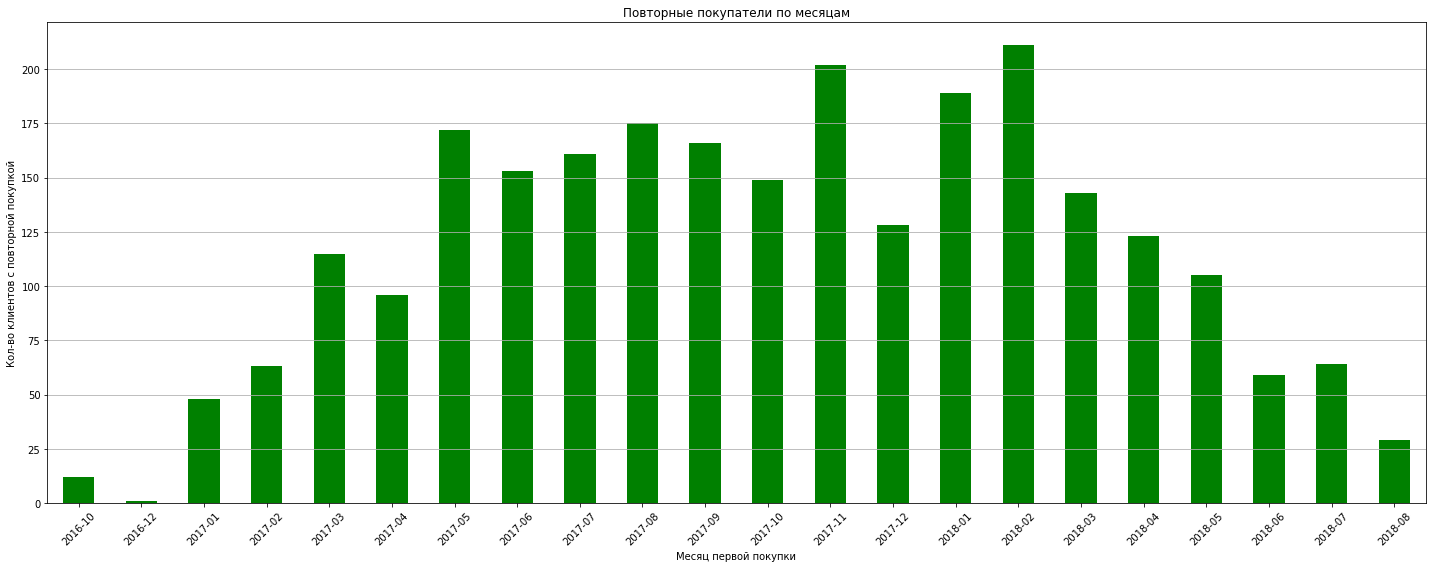

In [49]:
repeat_customers = df_metrics[df_metrics['is_repeat'] == True] #оставим только повторные заказы
repeat_customers['first_order_month'] = repeat_customers['first_order_date'].dt.to_period('M')#вновь укажем месяц первой покупки
monthly_repeaters = repeat_customers.groupby('first_order_month')['customer_unique_id'].nunique() #посчитаем уникальных клиентов с повторными покупками по месяцам их первой покупки

plt.figure(figsize=(20, 8))
monthly_repeaters.plot(kind='bar', color='green')
plt.title('Повторные покупатели по месяцам')
plt.ylabel('Кол-во клиентов с повторной покупкой')
plt.xlabel('Месяц первой покупки')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Пик наблюдается в мае, августе, ноябре 2017, где число повторных клиентов достигает более 170 человек в месяц. Это может быть связано с улучшением сервиса, маркетинговыми акциями или сезонным спросом. В январе-феврале 2018 наблюдается пик количества клиентов с повторной покупкой. С марта 2018 видно стабильное снижение клиентов с повторной покупкой. Возможные причины:
снижение качества продукта или сервиса, проблемы с доставкой или рост цен, отсутствие маркетинговой поддержки повторных заказов, конкуренты начали перехватывать клиентов. Клиенты, пришедшие в более поздние месяцы (2018), реже делают повторные покупки. Это сигнал, что удержание новых пользователей стало хуже — возможно, изменился сегмент аудитории или ухудшилось первое впечатление.

In [50]:
customer_activity = df_metrics.groupby('customer_unique_id').agg(orders_count=('order_id', 'nunique'), first_order_date=('order_date', 'min'), last_order_date=('order_date', 'max')).reset_index() #группируем по клиентам
customer_activity['days_active'] = (customer_activity['last_order_date'] - customer_activity['first_order_date']).dt.days #считаем количество дней между первой и последней покупкой

customer_activity['days_active'] = customer_activity['days_active'].replace(0, 1) #избегаем деления на 0

customer_activity['purchase_frequency'] = customer_activity['orders_count'] / customer_activity['days_active'] #частота покупок
customer_activity['avg_days_between_orders'] = customer_activity['days_active'] / (customer_activity['orders_count'] - 1) #среднее время между заказами (в днях)
customer_activity['avg_days_between_orders'].replace([float('inf')], pd.NA, inplace=True) #inf на NaN, если заказ 1

print(f"Средняя частота покупок: {customer_activity['purchase_frequency'].mean():.4f} заказов в день")
print(f"Среднее время между заказами: {customer_activity['avg_days_between_orders'].mean():.4f} дней")

Средняя частота покупок: 0.9902 заказов в день
Среднее время между заказами: 80.8385 дней


Среднее время между заказами — 80 дней — говорит о том, что пользователи возвращаются крайне неохотно. Цикл покупки около 1 раза в 2.5 месяца, что может быть приемлемо для некоторых категорий товаров (например, мебель, техника), но слишком редко для повседневных нужд. В сочетании с ранее рассчитанным коэффициентом повторных покупок всего 2,99%, видно, что клиенты в основном покупают один раз и не возвращаются. Это указывает на низкую вовлечённость и недостаточную ценность продукта/сервиса в глазах пользователя.

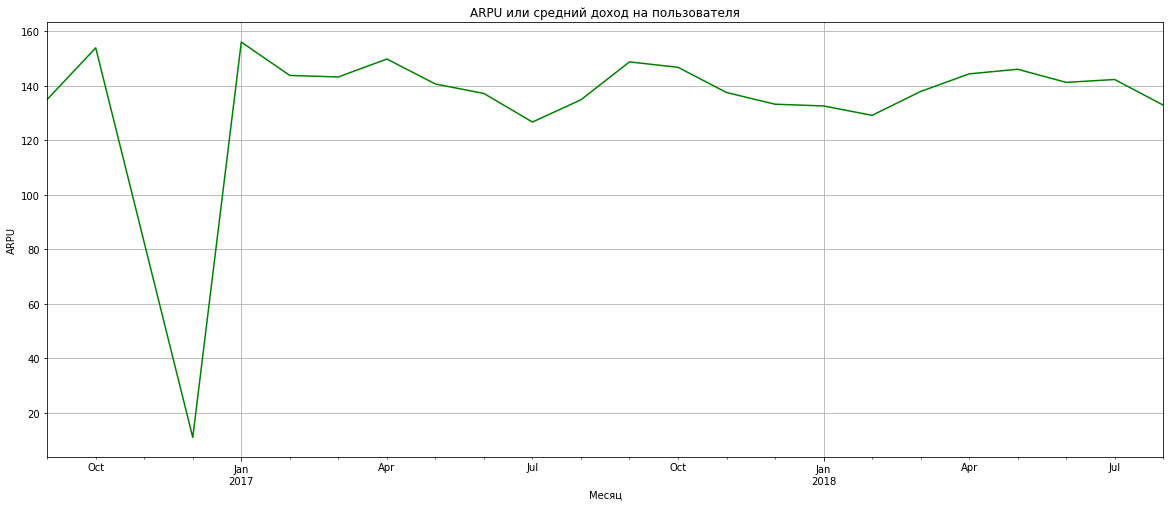

In [51]:
#Пятая — отражать денежное выражение вовлеченности клиента.
monthly_arpu = df_metrics.groupby('order_month').apply(lambda x: x['price'].sum() / x['customer_unique_id'].nunique())

plt.figure(figsize=(20, 8))
monthly_arpu.plot(color='green')
plt.title('ARPU или средний доход на пользователя')
plt.ylabel('ARPU')
plt.xlabel('Месяц')
plt.grid()

На основании данных о среднем доходе на пользователя (ARPU) можно сказать, что
прослеживается явная сезонность с пиками в октябре и апреле, что соответствует предпраздничному сезону и весеннему спросу после зимы. Заметны спады в июле (отпуска) и январе (после новогодних праздников). ARPU в октябре 2018 года снизился по сравнению с октябрем 2017 года, что может указывать на: изменение ценовой политики, Увеличение доли пользователей с низкими чеками, снижение покупательской способности.

**Задача 4: Выбрать одну из 3 основных гипотез с помощью фреймворка ICE.**


Посмотрев с продактом на когортный анализ и метрики, вы решили, что нужно изменить продукт. Метрики необходимо срочно повышать. Вместе с командой вы сформулировали 3 гипотезы, в которые вы верите. По каждой гипотезе команда заполнила показатели по Ease, Confidence. Вам нужно заполнить самый важный показатель — Impact. Для этого вам требуется:

Выбрать одну из трёх основных гипотез с помощью фреймворка ICE, которые были сформированы продактом и, кажется, должны улучшить пользовательский опыт в маркетплейсе.

Если исправим баг в системе процессинга заказов, то клиентам не придётся сталкиваться с проблемой отмены заказа, вследствие чего количество доставленных заказов увеличится. Считаем, что мы таким образом избавимся от всех отмен.

Если сократим время до отгрузки заказа, то клиенты перестанут получать свой заказ с запаздыванием, вследствие чего количество заказов увеличится за счёт повторных заказов.

Если создадим новый способ оплаты, который будет конвертировать клиентов в повторный заказ, то клиенты не будут испытывать трудности при оформлении заказа, вследствие чего количество заказов увеличится за счёт повторных заказов.

предположим, как гипотеза повлияет на количество заказов:

    В первом кейсе — это устранение отмен.

    Во втором и третьем — увеличение повторных заказов.

Гипотеза 1: Устранение отмен

    "Если исправим баг в системе процессинга заказов, то клиентам не придётся сталкиваться с проблемой отмены заказа"

Для рассчета Impact найдем сколько заказов с июня 2017 года было отменено и преположим, что все они бы были успешно доставлены, если бы был ипсравлен баг в системе процессинга заказов.

In [52]:
orders = pd.read_csv("olist_orders_dataset.csv", parse_dates=['order_purchase_timestamp', 'order_delivered_customer_date'])
orders = orders[orders['order_purchase_timestamp'] >= '2017-06-01'] #возьмем только заказы с июня 2017 года
filtered_orders = orders[orders['order_status'].isin(['unavailable', 'canceled'])]#возьмем только отмененные заказы
num_cancelled = filtered_orders.shape[0]

print(f"Отменённых заказов: {num_cancelled}")

Отменённых заказов: 974


Согласно указанной шкале перевода метрики в Impact получаем, что Impact первой гипотезы равен 5.

Гипотеза 2: Сокращение времени до отгрузки
Если сократим время до отгрузки заказа, то клиенты перестанут получать свой заказ с запаздыванием, вследствие чего количество заказов увеличится за счёт повторных заказов.   

"Клиенты перестанут получать заказ с опозданием → рост повторных заказов"


In [53]:
orders[['order_delivered_customer_date', 'order_estimated_delivery_date']] = orders[['order_delivered_customer_date', 'order_estimated_delivery_date']].apply(pd.to_datetime)
orders = orders[orders['order_purchase_timestamp'] >= '2017-06-01'] #возьмем только заказы с июня 2017 года
orders['is_late'] = (orders['order_delivered_customer_date'] > orders['order_estimated_delivery_date']).astype(int)

rate_convert = 0.0035  # 0.35% конверсия в повторный заказ
late_orders = orders['is_late'].sum() #количество опоздавших заказов
total_orders = len(orders) #количество всех заказов
late_ratio = late_orders / total_orders

late_customers = orders[orders['is_late'] == 1]['customer_id'].nunique()# уникальные клиенты с опозданиями
current_impact = late_customers * rate_convert

print(f"\nТекущий импакт (повторные заказы): {current_impact:,.1f}")


Текущий импакт (повторные заказы): 25.5


Согласно указанной шкале перевода метрики в Impact получаем, что Impact первой гипотезы равен 1.

Гипотеза 3: Новый способ оплаты
Если создадим новый способ оплаты, который будет конвертировать клиентов в повторный заказ, то клиенты не будут испытывать трудности при оформлении заказа, вследствие чего количество заказов увеличится за счёт повторных заказов.

"Упростим оплату — больше повторных заказов"

In [54]:
orders_all = orders[orders['order_purchase_timestamp'] >= '2017-06-01'] #возьмем только заказы с июня 2017 года
total_orders = len(orders_all) #количество всех заказов
rate_convert = 0.0035  # 0.35% конверсия в повторный заказ
potential_repeat_orders_payment = int(total_orders * rate_convert)

print("Потенциальный прирост заказов через способ оплаты:", potential_repeat_orders_payment)

Потенциальный прирост заказов через способ оплаты: 307


Согласно указанной шкале перевода метрики в Impact получаем, что Impact первой гипотезы равен 3.

In [55]:
# Impact по шкале
impact1 = 5
impact2 = 1
impact3 = 3

confidence = [8, 10, 5]
ease = [6, 4, 9]
impact = [impact1, impact2, impact3]

ice = [impact[i] * confidence[i] * ease[i] for i in range(3)] #расчёт ICE

hypotheses = ["Исправим баг с отменами заказов", "Сократим время отгрузки","Добавим новый способ оплаты"]

df_ice = pd.DataFrame({"Гипотеза": hypotheses,"Impact": impact,"Confidence": confidence,"Ease": ease,"ICE": ice})

print(df_ice.sort_values(by="ICE", ascending=False).reset_index(drop=True))
best_hypotheses = df_ice.sort_values(by='ICE', ascending=False)
print(best_hypotheses.head(1))

                          Гипотеза  Impact  Confidence  Ease  ICE
0  Исправим баг с отменами заказов       5           8     6  240
1      Добавим новый способ оплаты       3           5     9  135
2          Сократим время отгрузки       1          10     4   40
                          Гипотеза  Impact  Confidence  Ease  ICE
0  Исправим баг с отменами заказов       5           8     6  240


Лучшая гипотеза согласно ICE - гипотеза 1.

**Задача 5. Сформулировать нужные метрики, на которые ваша гипотеза должна повлиять.**

После предыдущего исследования у вас появилась гипотеза, которую можно реализовать для значительного улучшения метрик компании. Вы предложили использовать A/B-тестирование для проверки её эффективности.

Продакт попросил вас:

    Сформулировать метрики, на которые должна повлиять выбранная вами гипотеза.

    Сформулировать хотя бы по одной метрике в категории: целевые, прокси, guardrail.

In [56]:
df_goal = pd.read_csv("olist_orders_dataset.csv", parse_dates=['order_purchase_timestamp', 'order_delivered_customer_date'])
final_statuses = ['delivered', 'canceled'] #фильтруем только заказы с финальными статусами
df_goal = df_goal[df_goal['order_status'].isin(final_statuses)]

#целевая метрика-1
delivered_share = (df_goal['order_status'] == 'delivered').mean() #доля доставленных заказов
print(f"Целевая метрика: доля доставленных заказов {delivered_share:.2%}")

Целевая метрика: доля доставленных заказов 99.36%


Доля доставленных заказов составляет 99.36%, а отмен — всего 0.64%. Это означает, что даже если гипотеза об устранит все отмены, максимальный прирост метрики будет всего +0.64%.

In [57]:
#целевая метрика - доля отмен среди первых заказов-2
first_orders = df.sort_values('order_purchase_timestamp').groupby('customer_unique_id').first().reset_index() #находим первый заказ каждого клиента (по времени покупки)
canceled_first_orders = first_orders[first_orders['order_status'] == 'canceled'] #доля отмен среди первых заказов
total_first_orders = len(first_orders)
cancel_rate_new_customers = len(canceled_first_orders) / total_first_orders

print(f"Доля отмен среди первых заказов: {cancel_rate_new_customers:.2%}")
print(f"Всего первых заказов: {total_first_orders}")
print(f"Из них отменено: {len(canceled_first_orders)}")

Доля отмен среди первых заказов: 0.01%
Всего первых заказов: 93342
Из них отменено: 6


Также метрика - доля отмен среди первых заказов крайне низка (0.01%), что означает, что метрика отмен среди новых пользователей может быть нецелесообразна, выберем другую метрику.

In [58]:
#целевая метрика - доля отмен среди дорогих заказов-3
df_new = (orders.merge(customers, on='customer_id').merge(orders_items.groupby('order_id')['price'].sum().reset_index(), on='order_id')) #создадим новый датасет, объединив все три первоначальных, до этого объединяли два

first_orders_new = df_new.sort_values('order_purchase_timestamp').groupby('customer_unique_id').first().reset_index() # находим первые заказы каждого клиента
canceled_statuses = ['canceled', 'unavailable'] #статусы отмененных заказов
first_orders_new['is_canceled'] = first_orders_new['order_status'].isin(canceled_statuses)

#выделим ценовые группы
first_orders_new['price_group'] = pd.cut(first_orders_new['price'], bins=[0, 50, 100, 200, 500, float('inf')],labels=['<50', '50-100', '100-200', '200-500', '500+'])

cancel_rate_by_price = first_orders_new.groupby('price_group')['is_canceled'].mean().reset_index()#посчитаем долю отмен по ценовым группам
cancel_rate_by_price.columns = ['Ценовая группа', 'Доля отмен']
print("Доля отмен по ценовым группам:")
print(cancel_rate_by_price.to_string(index=False))

Доля отмен по ценовым группам:
Ценовая группа  Доля отмен
           <50    0.004247
        50-100    0.003972
       100-200    0.003170
       200-500    0.006018
          500+    0.009044


Text(0.5, 0, 'Ценовая группа')

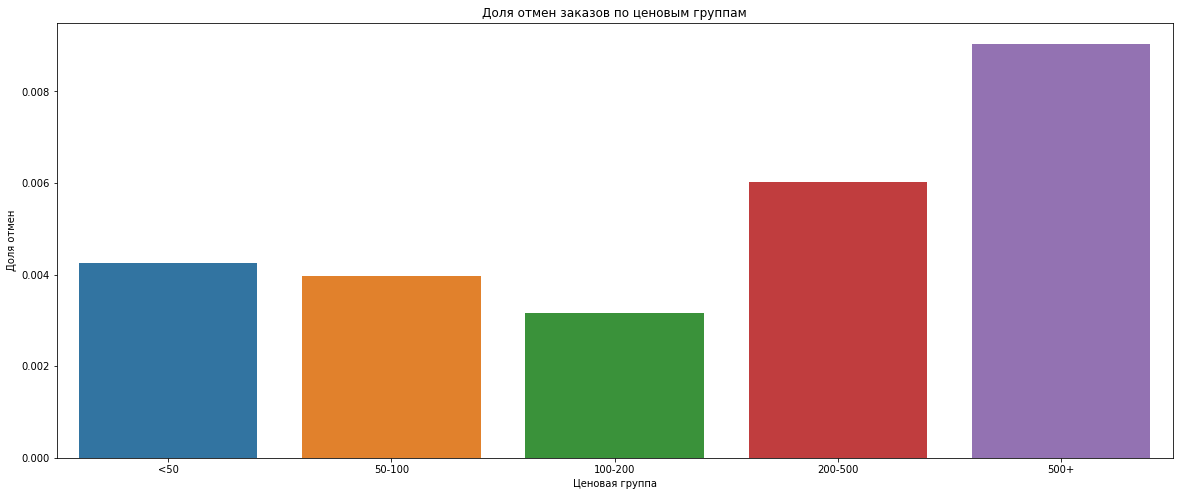

In [59]:
#построим гистограмму для отображения долей в ценовых группах
plt.figure(figsize=(20, 8))
sns.barplot(x='Ценовая группа', y='Доля отмен', data=cancel_rate_by_price)
plt.title('Доля отмен заказов по ценовым группам')
plt.ylabel('Доля отмен')
plt.xlabel('Ценовая группа')

Целевая метрика (доля отмен) подтверждает, что цена заказа — значимый фактор риска. Оптимизация работы с дорогими заказами может снизить отмены на 30-50% в верхних ценовых группах.

In [60]:
#прокси-метрика-1
canceled_share = (df['order_status'] == 'canceled').mean()#доля отменённых заказов
print(f"Прокси-метрика: доля отменённых заказов: {canceled_share:.2%}")

Прокси-метрика: доля отменённых заказов: 0.01%


Метрика нецелесообразна, так как отмененных заказов мало.

In [61]:
#прокси-метрика-2
first_orders_new['purchase_month'] = first_orders_new['order_purchase_timestamp'].dt.to_period('M')
metric = first_orders_new[first_orders_new['price'] > 500].groupby(['purchase_month', 'is_canceled'])['order_id'].count().unstack().assign(cancel_rate=lambda x: x[True]/(x[True]+x[False]))
print("Сезонность отмен:")
print(metric['cancel_rate'].sort_values(ascending=False).head())

Сезонность отмен:
purchase_month
2017-07    0.040000
2018-07    0.024291
2017-08    0.012987
2017-11    0.011494
2018-04    0.010989
Freq: M, Name: cancel_rate, dtype: float64


Пик отмен приходится на июль: июль 2017: 4.0% отмен (максимальный показатель),
июль 2018: 2.4% отмен. Это в 2-4 раза выше, чем в другие месяцы (например, ноябрь 2017 — 1.1%). Также, проблемные периоды: август 2017 (1.3%), апрель 2018 (1.1%). Отмены в ноябре могут быть связаны с распродажами и поиском более дешевых товаров, отмены летом могут связаны с периодом отпусков и возможными тратами на поездки вместо покупок товаров. Сезонность — значимый фактор. Оптимизация процессов в проблемные месяцы даст заметный эффект.

In [62]:
#прокси-метрика-3
df_new_5 = orders.merge(customers, on='customer_id', how='left') #объединим данные заказов и клиентов
repeat_data = df_new_5[df_new_5['order_status'] == 'delivered'].groupby('customer_unique_id')['order_id'].nunique()
conversion_to_repeat = (repeat_data > 1).sum() / repeat_data.count()#конверсия в повторный заказ
print(f"Прокси-метрика: конверсия в повторный заказ: {conversion_to_repeat:.2%}")

Прокси-метрика: конверсия в повторный заказ: 2.78%


Только 2.78% клиентов делают второй заказ, что указывает на: проблемы с удержанием клиентов, неэффективность постпокупного взаимодействия, возможное несоответствие ожиданий (качество товаров/сервиса). Требуется внедрение программ лояльности и персонализации. Оптимизация этой метрики даст болшьшой рост прибыли.

In [63]:
ltv = df_new.groupby('customer_unique_id')['price'].sum().mean() #средняя прибыль, которую бизнес получает от одного клиента за всё время взаимодействия
print(f"Средний LTV: {ltv:.2f}")

Средний LTV: 141.24


Значение показывает, что один клиент в среднем приносит 141,24, что достаточно мало и можно улучшать метрику.

In [64]:
#Guardrail-метрика
orders_delivered['order_delivered_customer_date'] = pd.to_datetime(orders_delivered['order_delivered_customer_date']) #преобразуем в datetime
orders_delivered['order_purchase_timestamp'] = pd.to_datetime(orders_delivered['order_purchase_timestamp']) #преобразуем в datetime
orders_delivered['delivery_time'] = (orders_delivered['order_delivered_customer_date'] - orders_delivered['order_purchase_timestamp']).dt.days #считаем разницу в днях
avg_delivery_time = orders_delivered['delivery_time'].mean() #среднее время доставки (считаем в днях)
print(f"Guardrail - Среднее время до доставки (в днях): {avg_delivery_time:.2f} дней")

Guardrail - Среднее время до доставки (в днях): 12.09 дней


Показатель среднего времени доставки достаточно большой и можно его улучшать.

**Задача 6: Сформулировать выводы о проделанной работе.**

В процессе исследования данных маркетплейса был рассчитан медианный retention 1-го и 3-го месяцев, построена тепловая карта, выведен топ-5 когорт по retention на 3-й месяц, оценено наличие Product/Market Fit, определены метрики дл максимизации прибыли компании, исследованы предложенные гипотезы и по методике ICE выбрана одна из них для дальнейшего улучшения. 

В результате работы можно сделать выводы, что retention крайне низкий (0,0035), менее 1% клиентов возвращаются через 1 месяц, а на 3-й месяц retention падает до окло 0.1%. Даже в лучшей когорте (ноябрь 2017) retention на 3-й месяц — 0.5%. Большинство клиентов совершают только одну покупку, не делают заказ повторно даже в первый месяц. Retention близок к нулю и быстро убывает, что сигнализирует об отсутствии product/market fit. Даже в «лучшей» когорте retention 3-го месяца более 99% пользователей не вернулись через 3 месяца, что говорит об отсутствии лояльности и привычки к маркетплейсу. На основании таких метрик product/market fit у маркетплейса отсутствует. Повторные покупки крайне редки, что говорит о низкой ценности продукта в глазах клиента. Однако, retention не уходит в 0 после первого месяца и видно стабильные значения удержания на 2–3 месяцах. Всплеск в начале 2017 года: скорее всего, это ошибка в данных или же начало активности платформы или разовой маркетинговой акции. После всплеска поведение выравнивается и остаётся на низком уровне. Сравнивался retention за 14 дней и 30 дней с момента первой покупки (1,87 и 1,56): оба показателя очень низкие — меньше 2%, что говорит о слабом удержании клиентов. PMF — отсутствует, так как пользователи не возвращаются спустя 2–4 недели. Маркетплейс не удовлетворяет ключевую потребность клиента: в удобстве, ассортименте, сервисе или цене. Возможными причинами отсутствия PMF могут быть слабое ценностное предложение – маркетплейс не предлагает достаточной пользы для возврата клиента, проблемы с ассортиментом или ценами – возможно, товары недостаточно разнообразны или неконкурентны, плохой пользовательский опыт – неудобная доставка, интерфейс или проблемы с доверием, проблемы с самим маркетплейсом (сбои в работе платформы), ориентир потребителей только на разовые покупки. 

Ключевые метрики для роста прибыли:  
1.Рост объёма продаж (месячная выручка) → рост, но сезонные спады.  
2.MAU (уникальные покупатели).  
3.Конверсия новых клиентов в повторные заказы.  
4.Среднее количество заказов на клиента (мало повторных покупок). 
5.ARPU (средний доход на пользователя). 

С начала 2017 года наблюдается уверенный и быстрый рост объёма продаж. Пик достигнут к ноябрю 2017 года, после чего доход стабильно на высоком уровне.Заметны спады в декабре, июне что может быть связано с сезонными факторами (например, праздники, отпускной сезон и т.п.). Продажи стабильно растут, несмотря на незначительные колебания — это сигнал, что продукт востребован.После достижения пика в конце 2017 года, в 2018 году спрос удерживается на высоком уровне, что говорит о возросшем устойчивом интересе аудитории. зВ данных присутствуют значительные колебания числа уникальных покупателей (MAU) в период с октября 2017 по июль 2018 года. Максимальная активность (6000-7000 пользователей) наблюдалась в ноябре 2017 и январе 2018. Минимальные значения (1000-2000 пользователей) зафиксированы в декабре 2016. Начиная с января 2017 года наблюдается стремительный рост числа активных пользователей. Особенно сильный прирост заметен с апреля по ноябрь 2017. Это может говорить о хорошем маркетинге, запуске новых фич, расширении ассортимента или сезонности. 

MAU достигает максимума в декабре 2017 (более 7000 активных пользователей). Вероятно, это связано с праздничным сезоном (рождественские и новогодние покупки).В январе 2018 — резкий спад, возможно, из-за окончания праздничного спроса. Пик активности виден в марте, мае, январе, октябре-ноябре. Это может быть связано с праздниками и праздничными скидками. Рассчитанная метрика repeat_rate показывает устойчиво низкие значения почти во всех когортных месяцах, за исключением одного аномального выброса (значение 1.0 на втором месяце). Большинство значений от 2 до 6,5%, это указывает на слабую вовлеченность новых пользователей после первой покупки. Постепенное снижение показателя с течением времени, начиная примерно с когорты 11 (месяц), значения идут вниз и достигают <1% в последних месяцах. Это может говорить о снижении эффективности онбординга, качества продукта или маркетинга, особенно в привлечении релевантной аудитории.

Заинтересованность новых клиентов в повторный заказ в первые 30 дней = 9.9881%. Продукт слабо удерживает новых клиентов. Возможные причины: нет явной потребности делать повторные заказы, высокая стоимость/доставка, ограниченное разнообразие или некачественный ассортимент, плохой опыт первой покупки. Всего 2.9999% клиентов совершили более одного заказа. Это довольно низкий показатель, что говорит о слабом удержании и вовлечении. Среднее число заказов на одного вовлечённого клиента 2.1139 — если пользователь совершает повторную покупку, он чаще всего делает только один повтор. Это говорит о том, что продукт недостаточно мотивирует к возврату. Пик наблюдается в мае, августе, ноябре 2017, где число повторных клиентов достигает более 170 человек в месяц. Это может быть связано с улучшением сервиса, маркетинговыми акциями или сезонным спросом. В январе-феврале 2018 наблюдается пик количества клиентов с повторной покупкой. С марта 2018 видно стабильное снижение клиентов с повторной покупкой. Возможные причины: снижение качества продукта или сервиса, проблемы с доставкой или рост цен, отсутствие маркетинговой поддержки повторных заказов, конкуренты начали перехватывать клиентов. Клиенты, пришедшие в более поздние месяцы (2018), реже делают повторные покупки. Это сигнал, что удержание новых пользователей стало хуже — возможно, изменился сегмент аудитории или ухудшилось первое впечатление. Среднее время между заказами — 80 дней — говорит о том, что пользователи возвращаются крайне неохотно. Цикл покупки около 1 раза в 2.5 месяца, что может быть приемлемо для некоторых категорий товаров (например, мебель, техника), но слишком редко для повседневных нужд. В сочетании с ранее рассчитанным коэффициентом повторных покупок всего 2,99%, видно, что клиенты в основном покупают один раз и не возвращаются. Это указывает на низкую вовлечённость и недостаточную ценность продукта/сервиса в глазах пользователя. 

На основании данных о среднем доходе на пользователя (ARPU) можно сказать, что прослеживается явная сезонность с пиками в октябре и апреле, что соответствует предпраздничному сезону и весеннему спросу после зимы. Заметны спады в июле (отпуска) и январе (после новогодних праздников). ARPU в октябре 2018 года снизился по сравнению с октябрем 2017 года, что может указывать на: изменение ценовой политики, Увеличение доли пользователей с низкими чеками, снижение покупательской способности.

Были исследованы три гипотезы и лучшая гипотеза согласно ICE:"Если исправим баг в системе процессинга заказов, то клиентам не придётся сталкиваться с проблемой отмены заказа, вследствие чего количество доставленных заказов увеличится. Считаем, что мы таким образом избавимся от всех отмен". Метриками было подтверждено, что цена заказа — значимый фактор риска. Оптимизация работы с дорогими заказами может снизить отмены на 30-50% в верхних ценовых группах. Пик отмен приходится на июль: июль 2017: 4.0% отмен (максимальный показатель), июль 2018: 2.4% отмен. Это в 2-4 раза выше, чем в другие месяцы (например, ноябрь 2017 — 1.1%). Также, проблемные периоды: август 2017 (1.3%), апрель 2018 (1.1%). Отмены в ноябре могут быть связаны с распродажами и поиском более дешевых товаров, отмены летом могут связаны с периодом отпусков и возможными тратами на поездки вместо покупок товаров. Сезонность — значимый фактор. Оптимизация процессов в проблемные месяцы даст заметный эффект. С помощью метрики LTV выявлено, что один клиент в среднем приносит 141,24, что достаточно мало и можно улучшать метрику. Среднее время до доставки  12.09 дней, это достаточно большой показатель и можно его улучшать.

Рекомендации:  

Необходимо исследовать причины низкого удержания, улучшить постпокупной опыт, оптимизировать ассортимент и цены. Стоит обратить особое внимание на увеличение повторных покупок (скидки, подписки), улучшение первого впечатления (онбординг, сервис), мониторинг сезонности (акции в пиковые месяцы).  Для приобретения Product/Market Fit необходимо выявить проблемы низкого уровня удержания клиентов. Возможно провести опросы и интервью клиентов. Возможно, стоит запустить акции, скидки или персональные предложения, создать прогрумму лояльности. Стоит провести исследование и понять какие типы товаров являются наиболее успешными и сделать на них акцент. Запустить A/B-тесты на отдельные сегменты: возможно, продукт работает только на конкретную аудиторию или в конкретном регионе. Усовершенствовать доставку, систему подписок, уведомлений и напоминаний.Также, для роста метрик можно тестировать новые способы оплаты, сегментировать аудиторию (возможно, продукт подходит только для B2B или редких покупок).   

Итог: маркетплейс имеет потенциал, но требует изменений в удержании клиентов и устранении технических проблем.